*Reinforcement learning (2023-2024)*
 - Multi-armed bandit solutions

*Presented by: Reza Saadatyar*
*E-mail: Reza.Saadatyar92@gmail.com*

***K-Arms Bandit Epsilon-Greedy Policy:***
Initialize, for a = 1 to k:
$Q(a) \leftarrow 0$
$N(a) \leftarrow 0$
Loop forever:
A $\leftarrow$ argmax$_{a}$ $Q(a)$ with probability $1-\epsilon$ or a random action with probability $\epsilon$
$R \leftarrow$ bandit or environment ($A$)
$N(A) \leftarrow N(A)+1$
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$

In [43]:
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
Num_actions = 10
qs = np.random.randn(1, Num_actions)
optimal_action = np.argmax(qs)
Time_step = 10000
epsilon = 0.2

**Plot greedy**

In [45]:
def plot_greedy(reward, select_action, optimal_action, til, epsilon):
    !mkdir Images
    Optimal_Action_Percent = np.mean(select_action == optimal_action)
    fig, axs = plt.subplots(nrows=2, figsize=(6, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(reward.flatten(),label='$\epsilon$-greedy Rewards')
    axs[0].set_ylabel('Reward', fontsize=10)
    # axs[0].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"Optimal action percent: {Optimal_Action_Percent*100:0.0f}%", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(select_action.flatten(),label='$\epsilon:$-greedy Selected Actions')
    axs[1].set_xlabel('Time Step', fontsize=10)
    axs[1].set_ylabel('Selected Actions', fontsize=10)
    # axs[1].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f"Optimal action: {optimal_action}; $\epsilon$:{epsilon}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()

    filename = f'Images/{til}.svg'
    fig.savefig(filename, format='svg')

**Greedy Algorithm:**
Greedy algorithm only consider the reward at the moment and do not take the long-term into consideration (action only based on max A).
Greedy algorithm based solely on exploitation.
***Exploitation*** is when the agent knows all his options and chooses the best option based on the previous success rates

***Greedy Algorithm for stationary state***
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

Time_step:: 100%|██████████| 10000/10000 [00:00<00:00, 17779.10it/s]

Q greedy algorithm: [[ 0.          1.2019226   0.          0.          0.          0.
  -0.13617242  0.         -0.93956155  0.        ]]



A subdirectory or file Images already exists.


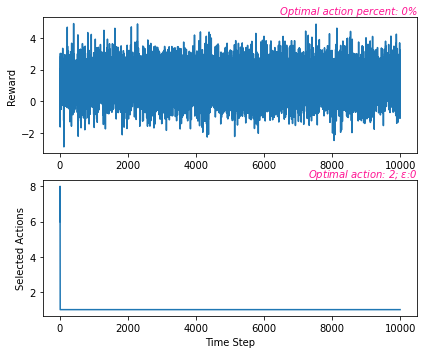

In [46]:
def greedy_1episode (qs, time_step, num_actions, epsilon, til):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))

    for i in tqdm(range(0, time_step), desc="Time_step:"):
    # ===================================== Exploitation =========================================
        A = np.where(q == np.max(q))[1]
        A = A[np.random.randint(0, len(A))]

        select_action[:, i] = A
        counter[:, A] = counter[:, A] + 1           # The number of occurrences of action A

        reward[:, i] = qs[:, A] + np.random.randn(1)

        q[:, A] = q[:, A] + 1 / counter[:, A] * (reward[:, i] - q[:, A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til, epsilon,)

greedy_1episode(qs, Time_step, Num_actions, epsilon=0, til='Greedy')

***Epsilon greedy Algorithm for stationary state***
It algorithm based on exploitation ana exploration.
Giving chance to all actions.
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

Time_step:: 100%|██████████| 10000/10000 [00:00<00:00, 14141.64it/s]

Q greedy algorithm: [[ 0.          1.28727851  2.56711978 -1.10178335  0.45901934  1.33016747
   0.36592749  0.38494569  0.0163293   1.45472331]]



A subdirectory or file Images already exists.


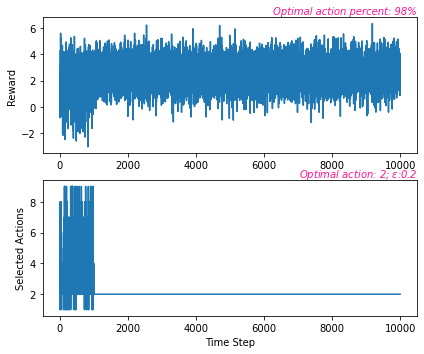

In [47]:
def epsilon_greedy_1episode (qs, time_step, num_actions, epsilon, til):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))
    for i in tqdm(range(0,time_step), desc="Time_step:"):
    # ===================================== Exploitation =========================================
        A = np.where(q==np.max(q))[1]
        A = A[np.random.randint(0,len(A))]
    # ---------------------------------------- Exploration ---------------------------------------
        if i > 1e3:
            """
            The greedy algorithm can be used if there is a good interaction with the environment and sufficient knowledge of the environment.
            """
            epsilon = 0
        if np.random.rand(1) < epsilon:            #  [0 1]  epsilon = 0.1
           A =  np.random.randint(1,num_actions , 1)
    # --------------------------------------------------------------------------------------------
        select_action[:,i] = A
        counter[:,A] = counter[:,A]+1

        reward[:,i] = qs[:,A] + np.random.randn(1)

        q[:,A] = q[:,A] + 1/counter[:,A]*(reward[:,i] - q[:,A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til, epsilon=0.2)

epsilon_greedy_1episode (qs, Time_step, Num_actions, epsilon, til='e-greedy')

***Epsilon greedy Algorithm for N episode in stationary & non-stationary state***
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples
$Q(A) \leftarrow Q(A)+\alpha*({R-Q(A)})$; $\alpha\leftarrow$ Constant alpha

A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:46<00:00,  6.01it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:12<00:00,  7.52it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:38<00:00,  6.33it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [04:03<00:00,  4.11it/s]


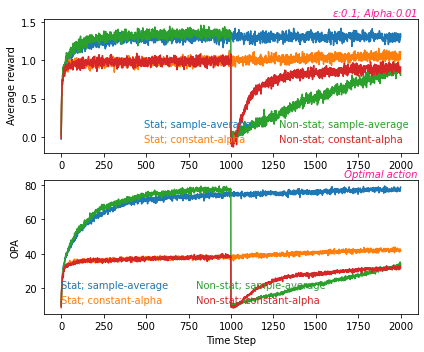

'\nStat:stationary\nNon-Stat: Non-stationary\n'

In [58]:
def epsilon_greedy_Nepisode (axs, num_actions, time_step, num_episode, alpha, epsilon, type, method):
    select_action = np.zeros((time_step, num_episode))
    reward = np.zeros((time_step, num_episode))
    optimal_action = np.zeros((time_step, num_episode))

    for i in tqdm(range(0, num_episode), desc="Number_episode:"):

        qs = np.random.randn(1, num_actions)
        q = np.zeros((1, num_actions))
        counter = np.zeros((1, num_actions))
        for j in range(0, time_step):
            # ===================================== Exploitation =============================================
            if (j == np.floor(time_step / 2)) and (type == 'Non-stat'):  # Non-stationary
                qs = np.random.randn(1, num_actions)

            optimal_action[j, i] = np.argmax(qs)
            A = np.where(q == np.max(q))[1]
            A = A[np.random.randint(0, len(A))]
            # ---------------------------------------- Exploration -------------------------------------------
            if np.random.rand(1) < epsilon:  #  [0 1]  epsilon = 0.1
                A = np.random.randint(1, num_actions, 1)
            # ------------------------------------------------------------------------------------------------
            select_action[j, i] = A
            reward[j, i] = qs[:, A] + np.random.randn(1)
            counter[:, A] = counter[:, A] + 1
            if method == 'sample-average':
                q[:, A] = q[:, A] + (1 / counter[:, A]) * (reward[j, i] - q[:, A])
            else:
                q[:, A] = q[:, A] + alpha * (reward[j, i] - q[:, A])

    mean_reward = np.mean(reward, axis=1)
    optimal_action_percent = np.zeros((time_step, num_episode))

    for i in range(0, num_episode):
        optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]

    optimal_action_percent = np.mean(optimal_action_percent, axis=1)

    # fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(mean_reward, label=type+'; '+method)
    axs[0].set_ylabel(' Average reward')
    axs[0].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"$\epsilon$:{epsilon}; Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(optimal_action_percent * 100, label=type+'; '+ method)
    axs[1].set_xlabel('Time Step')
    axs[1].set_ylabel('OPA')
    axs[1].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2)


alpha = 0.01
epsilon = 0.1
num_actions = 10
time_step = 2000
num_episode = 1000
fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Stat', method='sample-average')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Stat', method='constant-alpha')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Non-stat', method='sample-average')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Non-stat', method='constant-alpha')
plt.show()
!mkdir Images
filename = f'Images/E-greedy_Nepisode.svg'
fig.savefig(filename, format='svg')
"""
Stat:stationary
Non-Stat: Non-stationary
"""

***Upper confidence bound policy (UCB):***
$A_{t} = argmax {\left\lbrack\ Q_{t} + c*\sqrt{log(t) \over N_{t}(a)} \right\rbrack}$

Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: divide by zero encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: divide by zero encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np

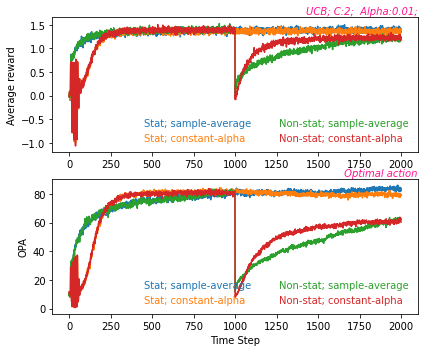

'\nStat:stationary\nNon-Stat: Non-stationary\n'

In [67]:
def UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type, method):
    select_action = np.zeros((Time_step, num_episode))
    reward = np.zeros((Time_step, num_episode))
    optimal_action = np.zeros((Time_step, num_episode))

    for i in tqdm(range(0, num_episode), desc="Number_episode:"):

        qs = np.random.randn(1, Num_actions)
        q = np.zeros((1, Num_actions))
        counter = np.zeros((1, Num_actions))
        for j in range(0, Time_step):
            # ===================================== Exploitation =============================================
            if (j == np.floor(Time_step / 2)) and (type == 'Non-stat'):  # Non-stationary
                qs = np.random.randn(1, Num_actions)

            optimal_action[j, i] = np.argmax(qs)
            B = q + c * np.sqrt(np.log(j + 1) / counter)
            B = np.where(np.isnan(B), 1e10, B)
            B = np.where(np.isinf(B), 1e10, B)
            A = np.where(B == np.max(B))[1]
            A = A[np.random.randint(0, len(A))]
            # ---------------------------------------- Exploration -------------------------------------------
            if np.random.rand(1) < epsilon:  #  [0 1]  epsilon = 0.1
                A = np.random.randint(1, Num_actions, 1)
            # ------------------------------------------------------------------------------------------------
            select_action[j, i] = A
            reward[j, i] = qs[:, A] + np.random.randn(1)
            counter[:, A] = counter[:, A] + 1
            if method == 'sample-average':
                q[:, A] = q[:, A] + (1 / counter[:, A]) * (reward[j, i] - q[:, A])
            else:
                q[:, A] = q[:, A] + alpha * (reward[j, i] - q[:, A])

    mean_reward = np.mean(reward, axis=1)
    optimal_action_percent = np.zeros((Time_step, num_episode))

    for i in range(0, num_episode):
        optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]
    optimal_action_percent = np.mean(optimal_action_percent, axis=1)

    plt.rcParams.update({'font.size': 10})
    axs[0].plot(mean_reward, label=type + '; ' + method)
    axs[0].set_ylabel('Average reward')
    axs[0].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"UCB; C:{c};  Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(optimal_action_percent * 100, label=type + '; ' + method)
    axs[1].set_xlabel('Time Step')
    axs[1].set_ylabel('OPA')
    axs[1].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2),


Num_actions = 10
c = 2
Time_step = 2000
alpha = 0.01
num_episode = 1000

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Stat', method='sample-average')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Stat', method='constant-alpha')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Non-stat', method='sample-average')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Non-stat', method='constant-alpha')
!mkdir Images
filename = f'Images/UCB.svg'
fig.savefig(filename, format='svg')
plt.show()
"""
Stat:stationary
Non-Stat: Non-stationary
"""

***Gradient bandit (Stochastic gradient ascent (SGA))***
$Pr({A_{t}=a})$=$e^{H_{t}(a)}\over{\sum_{b=1}^k e^{H_{t}(b)}}$=$\pi_{t}(a)$
$H_{t+1}(a)= H_t(a) + \alpha*(R_t - mean(R_t))(1_{\alpha=A_{t}} - \pi_{t}(a)$

A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


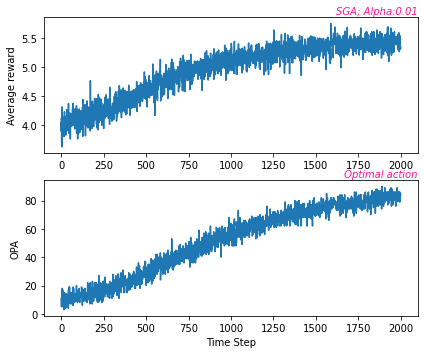

A subdirectory or file Images already exists.


In [70]:
Num_actions = 10
Time_step = 2000                    # Time step
alpha = 0.01
num_episode = 100
reward = np.zeros((Time_step, num_episode))
select_action = np.zeros((Time_step, num_episode))
optimal_action = np.zeros((1, num_episode))
optimal_action_percent = np.zeros((Time_step, num_episode))
!mkdir Images
for i in tqdm(range(0, num_episode), desc="Number_episode:"):

    h = np.ones((1, Num_actions))
    qs = 4 + np.random.randn(1, Num_actions)
    optimal_action[:, i] = np.argmax(qs)
    for j in range(0, Time_step):
        pr = np.exp(h)/np.sum(np.exp(h), axis=1)
        A = np.random.choice( range(0, Num_actions) , size = 1, replace = False, p = pr.flatten())

        select_action[j, i] = A
        reward[j, i] = qs[:, A] + np.random.randn(1)

        if j==0:
            baseline = reward[j, i]
        else:
            baseline = np.mean(reward[0:j, i])

        h = h + alpha*(reward[j, i] - baseline)*(np.where(np.arange(10)==A,1-pr,-pr))

mean_reward = np.mean(reward, axis=1)

for i in range(0, num_episode):
    optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]
optimal_action_percent = np.mean(optimal_action_percent, axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
plt.rcParams.update({'font.size': 10})
axs[0].plot(mean_reward, label='E-greedy Rewards')
axs[0].set_ylabel('Average reward')
axs[0].set_title(f"SGA; Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

axs[1].plot(optimal_action_percent * 100, label='Optimal action')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('OPA')
axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()
fig.savefig('SGA.svg', format='svg')
!mkdir Images
filename = f'Images/SGA.svg'
fig.savefig(filename, format='svg')
plt.show()

***Set Parameters Epsilon greedy, UCB & SGA***

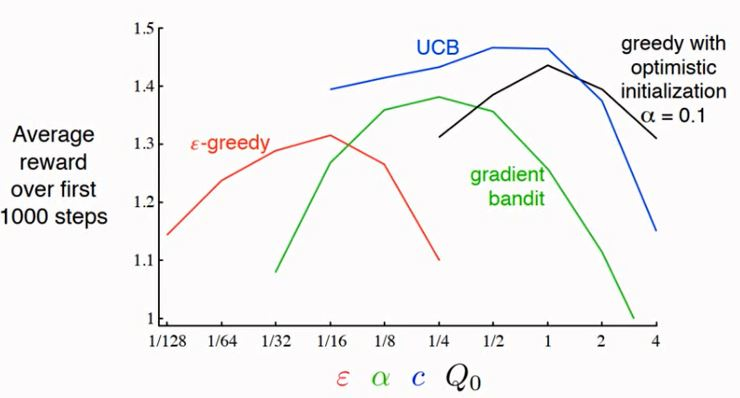

In [71]:
img_path='Set Parameters.JPG'
img=Image.open(img_path)
img